# Model Interpretability Marketting Campaign

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

 

Grading:  80% if meet the above requirements

Up to 20% for presentation and expanation.


## About Dataset - Marketing Campaign

Dataset Link - https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

**Context**
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

**Content**

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase

In [1]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=7ecba7a0e8cda15d9747f061a0e1c79304ccf5d938c7629fdcbc9fb87c62eaed
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [2]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = None

In [42]:
data = pd.read_csv("https://raw.githubusercontent.com/makarandmadhavi/ML-Data-Cleaning-and-Feature-Selection/main/marketing_campaign.csv", sep=";")
data.drop(columns = ["Z_CostContact","Z_Revenue","ID",],inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# EDA Data Cleaning and feature engineering


In [43]:

data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [44]:
data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'), inplace = True)
data['Year_Birth'] = data['Year_Birth'].apply(lambda x: 2020-x)
data = data.rename(columns={'Year_Birth': 'Age'})

Education_map = {'Basic':1,
            'Graduation':2,
            'Master':3,
            '2n Cycle':3,
            'PhD':4}
# Create the mapped values in a new column
data['Education'] = data['Education'].map(Education_map)

from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Dt_Customer'] = (datetime(2020,1,1) - data['Dt_Customer']).dt.days

data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns = ["Kidhome","Teenhome"],inplace = True)

data['AmountSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(columns = ["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"],inplace = True)

data['NumPurchased'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data.drop(columns = ["NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases"],inplace = True)

data['Prev_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.drop(columns = ["AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2"],inplace = True)

maratial_map = {'Married':"Couple",
            'Together':"Couple",
            'Single':'Single',
            'Divorced':'Single',
            'Widow':'Single',
            'Alone':'Single',
            'Absurd':'Single',
            'YOLO':'Single'}
# Create the mapped values in a new column
data['Marital_Status'] = data['Marital_Status'].map(maratial_map)

dummy_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')

data = pd.concat([data, dummy_status], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)

data.head()

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple,Marital_Status_Single
0,63,2,58138.0,2675,58,3,7,0,1,0,1617,22,0,0,1
1,66,2,46344.0,2125,38,2,5,0,0,2,27,4,0,0,1
2,55,2,71613.0,2324,26,1,4,0,0,0,776,20,0,1,0
3,36,2,26646.0,2151,26,2,6,0,0,1,53,6,0,1,0
4,39,4,58293.0,2173,94,5,5,0,0,1,422,14,0,1,0


In [45]:
data.Income.quantile(0.99)

94437.68000000001

In [46]:
data.drop(data[data['Income'] >= 94437].index, inplace = True)


In [47]:
data.isnull().sum()


Age                      0
Education                0
Income                   0
Dt_Customer              0
Recency                  0
NumDealsPurchases        0
NumWebVisitsMonth        0
Complain                 0
Response                 0
Children                 0
AmountSpent              0
NumPurchased             0
Prev_campaigns           0
Marital_Status_Couple    0
Marital_Status_Single    0
dtype: int64

<Axes: >

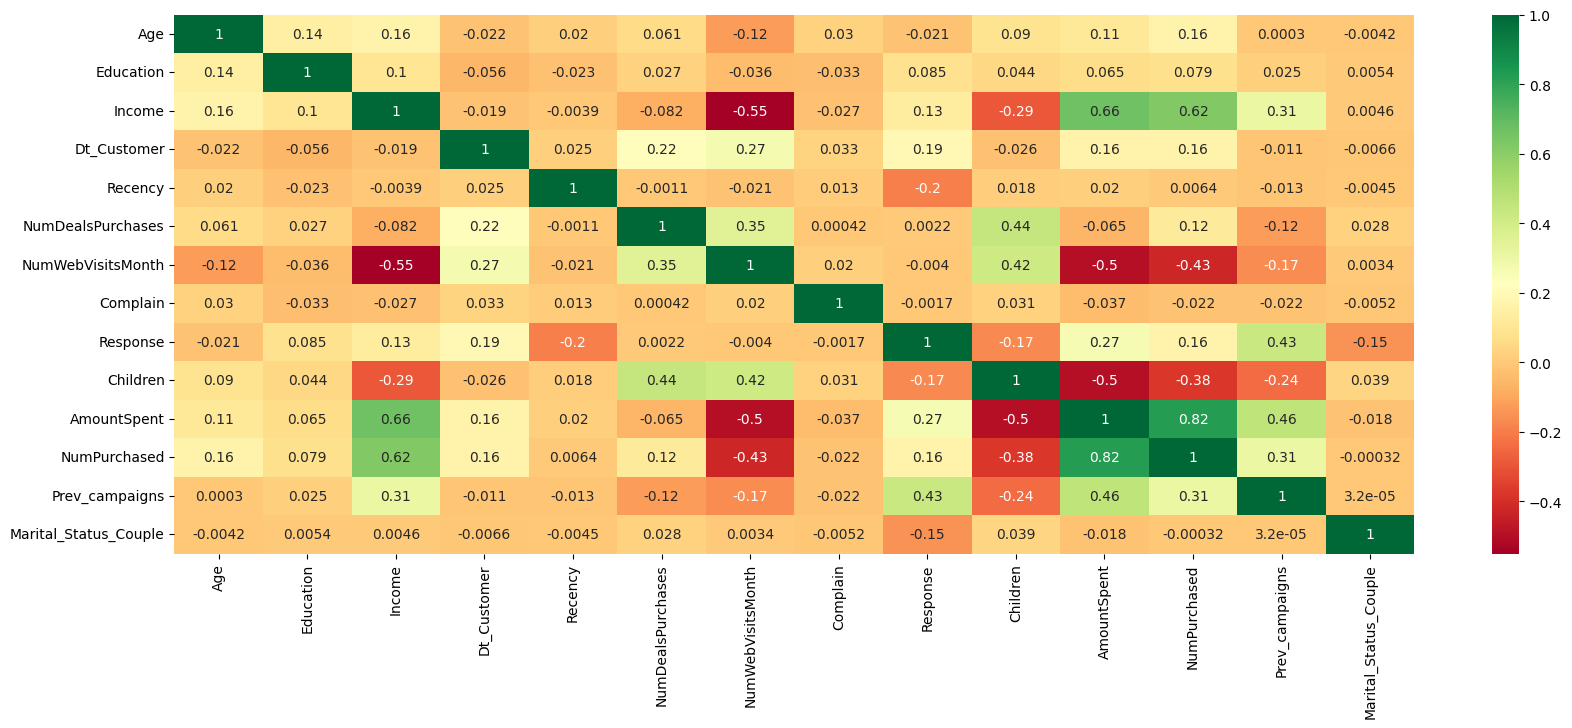

In [7]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# Logistic Regression ( Linear model )

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
y=data['Response']#specify the dependent variable and independent variable
x=data.drop(['Response'],axis=1)
x.head()

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple
0,63,2,58138.0,2675,58,3,7,0,0,1617,22,0,0
1,66,2,46344.0,2125,38,2,5,0,2,27,4,0,0
2,55,2,71613.0,2324,26,1,4,0,0,776,20,0,1
3,36,2,26646.0,2151,26,2,6,0,1,53,6,0,1
4,39,4,58293.0,2173,94,5,5,0,1,422,14,0,1


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)#divide the train ,test group
x_train.head()

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple
940,68,3,64831.0,2396,51,8,6,0,2,1120,14,0,0
1345,45,2,33249.0,2506,11,2,6,0,1,112,6,0,0
1884,35,4,30298.0,2053,48,1,3,0,0,28,5,0,0
594,48,4,59973.0,2303,47,1,1,0,0,382,14,0,1
1437,34,3,20491.0,2532,16,1,7,0,0,30,3,0,1


In [11]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(x_train,y_train)
print(loggreg_final.score(x_train,y_train))

0.85546875


In [12]:
y_pred=logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction
print(cm)

[[370  10]
 [ 58  10]]


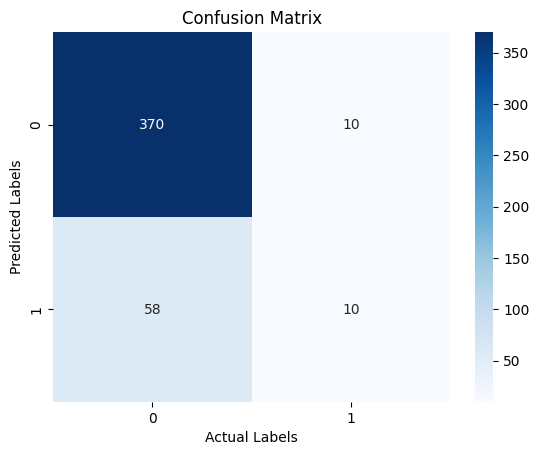

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()


In [13]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Response'], data[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple"]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.395
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                              111.8
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                   1.18e-231
Time:                        22:34:32   Log-Likelihood:                         -484.13
No. Observations:                2240   AIC:                                      994.3
Df Residuals:                    2227   BIC:                                      1069.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0013      0.001     -2.422      0.016      -0.002      -0.000
Education                 0.0266      0.008      3.535      0.000       0.012       0.041
Income                -5.288e-07   3.66e-07     -1.443      0.149   -1.25e-06     1.9e-07
Dt_Customer               0.0001   1.83e-05      7.015      0.000    9.24e-05       0.000
Recency                  -0.0026      0.000    -11.648      0.000      -0.003      -0.002
NumDealsPurchases         0.0147      0.004      3.515      0.000       0.006       0.023
NumWebVisitsMonth         0.0065      0.004      1.713      0.087      -0.001       0.014
Complain                  0.0514      0.066      0.776      0.438      -0.078       0.181
Children                 -0.0450      0.011     -3.930      0.000      -0.067      -0.023
AmountSpent               0.0001   2.25e-05      4.830      0.000    6.46e-05       0.000
NumPurchased             -0.0063      0.002     -3.746      0.000      -0.010      -0.003
Prev_campaigns            0.1995      0.011     18.425      0.000       0.178       0.221
Marital_Status_Couple    -0.1167      0.013     -8.801      0.000      -0.143      -0.091
==============================================================================
Omnibus:                      534.857   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1096.672
Skew:                           1.396   Prob(JB):                    7.26e-239
Kurtosis:                       4.990   Cond. No.                     6.03e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretting the Regression Coefficients

The coefficients of the independent variables in the regression model represent the change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant.

1. The coefficient for "Age" is -0.0013. This means that for every one unit increase in age, the dependent variable (Response) is expected to decrease by 0.0013, holding all other variables constant.

2. The coefficient for "Education" is 0.0266. This means that for every one unit increase in education, the dependent variable is expected to increase by 0.0266, holding all other variables constant.

3. The coefficient for "Income" is -5.288e-07. This means that for every one unit increase in income, the dependent variable is expected to decrease by 5.288e-07, holding all other variables constant. However, the p-value associated with this coefficient is 0.149, which is greater than the commonly used threshold of 0.05, indicating that this coefficient may not be statistically significant.

4. The coefficient for "Complain" is 0.0514, but the p-value associated with this coefficient is 0.438, which is greater than 0.05, indicating that this variable may not be statistically significant in the model.

5. The coefficients for "Recency", "Children", "AmountSpent", "NumPurchased", "Prev_campaigns", and "Marital_Status_Couple" all have p-values less than 0.05, indicating that they are statistically significant in the model.

It is important to note that the coefficients should be interpreted with caution, as the presence of multicollinearity or other numerical problems can affect their validity. Therefore, it is recommended to further investigate the model to ensure the robustness of the results.

The adjusted R-squared value is 0.391, which means that about 39.1% of the variability in the response variable can be explained by the independent variables in the model. The F-statistic is 111.8, and the p-value associated with it is very low (1.18e-231), which suggests that at least one of the independent variables is significantly related to the response variable.

The coefficients of the independent variables represent the amount of change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant. The p-value associated with each coefficient represents the statistical significance of that variable, i.e., whether or not the variable is significantly related to the response variable.

The model does not contain a constant, as indicated by the note [1], which means that the intercept is zero. The note [2] indicates that the standard errors assume that the covariance matrix of the errors is correctly specified.

The large condition number (6.03e+05) mentioned in note [3] suggests that there may be strong multicollinearity or other numerical problems in the model. This should be further investigated to ensure the validity of the results.

Overall, the model appears to be a good fit for the data, but further analysis is needed to assess the robustness of the results.



# Decision Tree (Tree based model)


Accuracy Score: 0.8459821428571429
Confusion Matrix:
[[344  36]
 [ 33  35]]

Decision Tree:



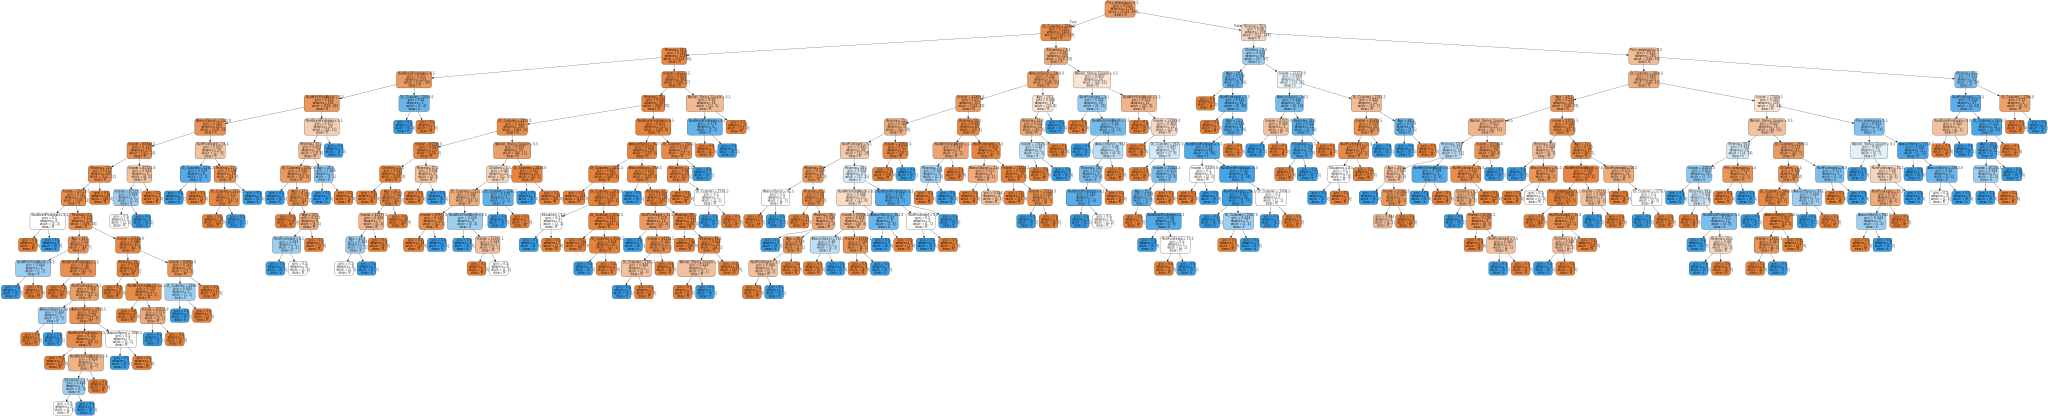

In [14]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import graphviz

# Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training set
dtc.fit(x_train, y_train)

# Use the decision tree classifier to make predictions on the testing set
y_pred = dtc.predict(x_test)

# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score and confusion matrix
print("Accuracy Score: {}".format(acc_score))
print("Confusion Matrix:\n{}".format(conf_mat))

# Visualize the decision tree using graphviz
dot_data = export_graphviz(dtc, out_file=None, feature_names=x_train.columns, class_names=y_train.name, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("breast_cancer_decision_tree")

# Print the decision tree
print("\nDecision Tree:\n")
graph = graphviz.Source(dot_data)
graph


## Interpretting the tree

The Gini value, also known as the Gini index or Gini impurity, is a measure of the impurity or randomness of a set of data, often used in decision trees. In decision trees, the Gini value is used to determine the optimal split at each node based on the purity of the data subsets resulting from the split.

The Gini value ranges from 0 to 1, with 0 indicating perfect purity (all data belongs to the same class) and 1 indicating perfect impurity (data is evenly distributed among all classes). In decision trees, the Gini value is calculated for each potential split, and the split with the lowest Gini value is chosen as the optimal split.

In practice, the Gini value is often used in conjunction with other measures of impurity, such as entropy, to help build more accurate decision trees.

As we have a problem og binary classification the model a split decision at every node depending on the given parameter value.

In [15]:

# Get numerical feature importances
tree_importances = list(dtc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [16]:

# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Prev_campaigns       Importance: 0.17
Variable: Dt_Customer          Importance: 0.15
Variable: Recency              Importance: 0.15
Variable: Income               Importance: 0.13
Variable: NumPurchased         Importance: 0.08
Variable: Age                  Importance: 0.06
Variable: Marital_Status_Couple Importance: 0.06
Variable: NumDealsPurchases    Importance: 0.05
Variable: AmountSpent          Importance: 0.05
Variable: NumWebVisitsMonth    Importance: 0.04
Variable: Children             Importance: 0.03
Variable: Education            Importance: 0.02
Variable: Complain             Importance: 0.0


## Interpretting variable importance

The feature importance shows Prev_campaign, Dt_Customer, Recency and Income have a high significance similar to the linear model

# Auto ML

In [48]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 2 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_tcagz0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.149 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [49]:
df = h2o.H2OFrame(data)
df["Response"] = df["Response"].asfactor()
df.describe(chunk_summary=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:2214
Cols:15

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     3        20                  1.0 KB   2.25388
CXI           Sparse Integers            1        6.66667             118  B   0.255483
C1N           1-Byte Integers (w/o NAs)  8        53.3333             17.8 KB  39.5263
C2            2-Byte Integers            2        13.3333             8.8 KB   19.4687
C8D           64-bit Reals               1        6.66667             17.4 KB  38.4957

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  45.1 KB  2214              1                              15
mean             45.1 KB  2214              1                              15
min              45.1 KB  2214              1                              15
max              45.1 KB  2214              1                              15
stddev           0  B     0                 0                              0
total            45.1 KB  2214              1                              15

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple,Marital_Status_Single
type,int,int,real,int,int,int,int,int,enum,int,int,int,int,int,int
mins,24.0,1.0,1730.0,2012.0,0.0,0.0,0.0,0.0,,0.0,5.0,0.0,0.0,0.0,0.0
mean,51.21318879855459,2.6644083107497774,51266.54151810947,2365.746160794945,49.175700090334274,2.333785004516709,5.355465221318874,0.009485094850948509,,0.9579945799457986,597.1404697380312,12.468383017163509,0.2836495031616975,0.6454381210478771,0.3545618789521229
maxs,127.0,4.0,93404.0,2711.0,99.0,15.0,20.0,1.0,,3.0,2525.0,32.0,4.0,1.0,1.0
sigma,11.971976898459362,0.8389671998614283,20244.354655689065,202.18840379501523,28.94522190386703,1.8937351087986132,2.4064276849329103,0.0969503648918201,,0.7500846453017618,594.2820231606587,7.1490264841217295,0.6544602133173475,0.4784884153133252,0.4784884153133252
zeros,0,0,0,0,28,30,7,2193,,618,0,4,1768,785,1429
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,2.0,58138.0,2675.0,58.0,3.0,7.0,0.0,1,0.0,1617.0,22.0,0.0,0.0,1.0
1,66.0,2.0,46344.0,2125.0,38.0,2.0,5.0,0.0,0,2.0,27.0,4.0,0.0,0.0,1.0
2,55.0,2.0,71613.0,2324.0,26.0,1.0,4.0,0.0,0,0.0,776.0,20.0,0.0,1.0,0.0


In [50]:
train, test, valid = df.split_frame(ratios=[0.7, 0.20], seed=1)

In [51]:
aml = H2OAutoML(max_models=10, balance_classes=True, seed=1)
aml.train(training_frame = train, y = 'Response')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/3
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [52]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_3_20230329_233831,0.888569,0.265755,0.612972,0.215668,0.282515,0.0798148
StackedEnsemble_BestOfFamily_1_AutoML_3_20230329_233831,0.88736,0.266584,0.614109,0.20715,0.282752,0.079949
GBM_1_AutoML_3_20230329_233831,0.881397,0.280038,0.602335,0.203489,0.292234,0.0854005
GBM_2_AutoML_3_20230329_233831,0.872627,0.306826,0.563568,0.241598,0.305533,0.0933502
GLM_1_AutoML_3_20230329_233831,0.86837,0.282188,0.586975,0.241227,0.291058,0.0847146
XGBoost_1_AutoML_3_20230329_233831,0.867836,0.361198,0.547944,0.22386,0.336237,0.113055
DRF_1_AutoML_3_20230329_233831,0.866708,0.52891,0.539586,0.222759,0.325012,0.105633
XRT_1_AutoML_3_20230329_233831,0.865925,0.356223,0.518215,0.191714,0.330064,0.108942
GBM_4_AutoML_3_20230329_233831,0.865716,0.321793,0.549785,0.230162,0.311148,0.0968129
XGBoost_3_AutoML_3_20230329_233831,0.863419,0.339966,0.538389,0.213558,0.321774,0.103538


In [53]:
#Getting the best model
best_model = h2o.get_model(lb[0,"model_id"])
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08128690536051095
RMSE: 0.2851085852101107
LogLoss: 0.27075993476107657
AUC: 0.8948877209746775
AUCPR: 0.6839616832405825
Gini: 0.789775441949355
Null degrees of freedom: 432
Residual degrees of freedom: 425
Null deviance: 380.7153717961534
Residual deviance: 234.47810350309229
AIC: 250.47810350309229

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36459888758885556
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      345  19   0.0522   (19.0/364.0)
1      27   42   0.3913   (27.0/69.0)
Total  372  61   0.1062   (46.0/433.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.364599     0.646154  58
max f2                       0.162318     0.723192  120
max f0point5                 0.465306     0.708812  45
max accuracy                 0.465306     0.900693  45
max precision                0.979066     1         0
max recall                   0.00475232   1         355
max specificity              0.979066     1         0
max absolute_mcc             0.465306     0.589909  45
max min_per_class_accuracy   0.166101     0.821429  117
max mean_per_class_accuracy  0.162318     0.828257  120
max tns                      0.979066     364       0
max fns                      0.979066     68        0
max fps                      4.39122e-05  364       399
max tps                      0.00475232   69        355
max tnr                      0.979066     1         0
max fnr                      0.979066     0.985507  0
max fpr                      4.39122e-05  1         399
max tpr                      0.00475232   1         355

Gains/Lift Table: Avg response rate: 15.94 %, avg score: 14.87 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0115473                   0.935144           6.27536   6.27536            1                0.960827    1                           0.960827            0.0724638       0.0724638                  527.536   527.536            0.0724638
2        0.0207852                   0.830408           6.27536   6.27536            1                0.886466    1                           0.927778            0.057971        0.130435                   527.536   527.536            0.130435
3        0.0300231                   0.790672           3.13768   5.30992            0.5              0.808148    0.846154                    0.890969            0.0289855       0.15942                    213.768   430.992            0.153926
4        0.0415704                   0.699773           5.02029   5.22947            0.8              0.754202    0.833333                    0.852978            0.057971        0.217391                   402.029   422.947            0.20915
5        0.0508083                   0.643349           6.27536   5.41963            1                0.661814    0.863636                    0.818221            0.057971        0.275362                   527.536   441.963            0.267121
6        0.101617                    0.528421           4.27866   4.84914            0.681818         0.584731    0.772727                    0.701476            0.217391        0.492754                   327.866   384.914            0.465281
7        0.150115                    0.329853           2.39061   4.05485            0.380952         0.410462    0.646154                    0.607456      

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

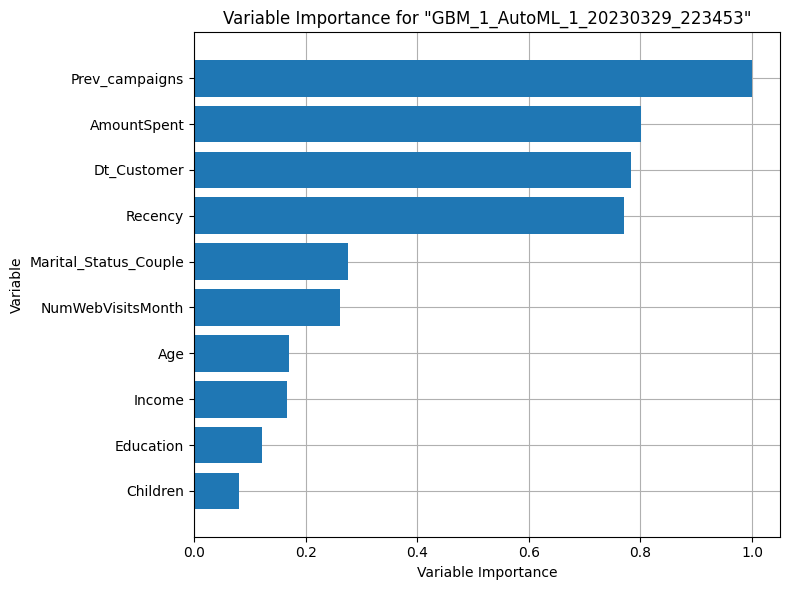

In [23]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


## Interpreting Variable Importance

The variable importance graph of best model of autoML shows us thet Prev_campaign is most important feature of the model followed by amount spent and Dt_customer, recency

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

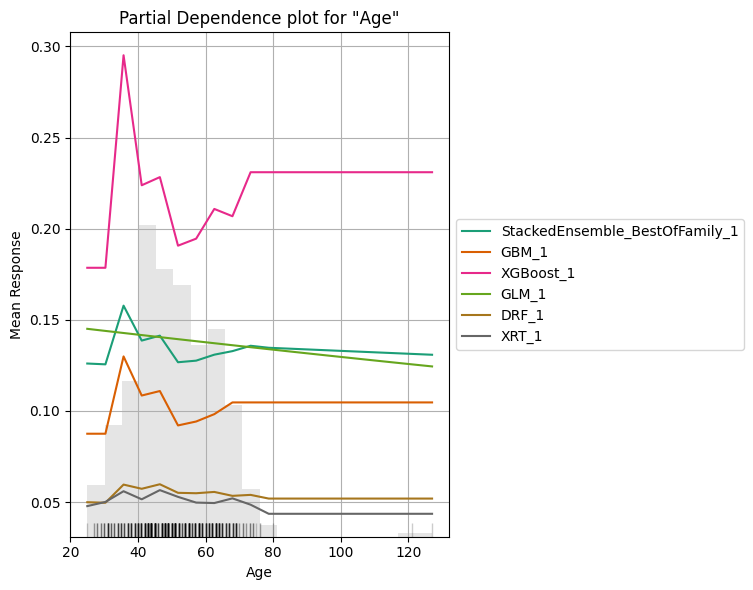

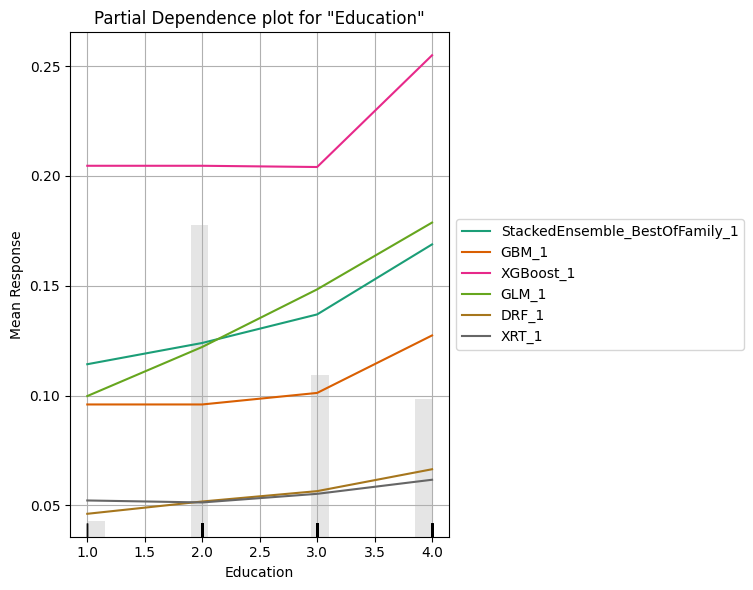

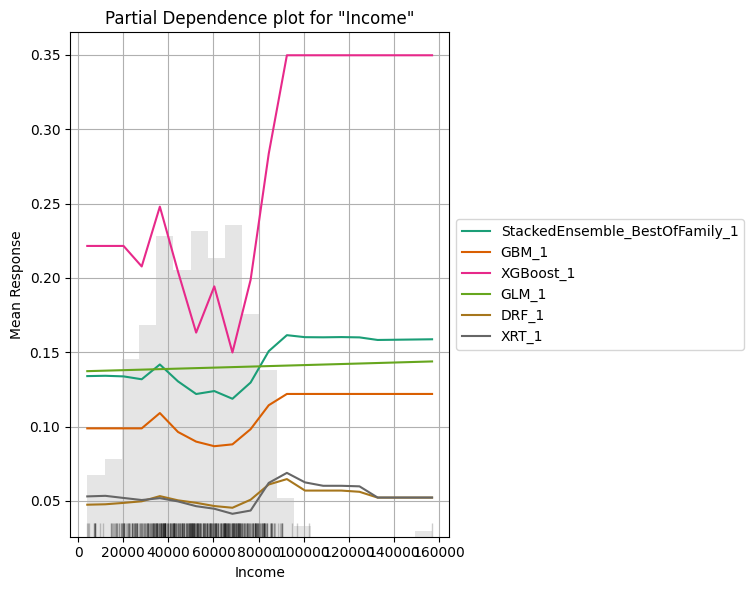

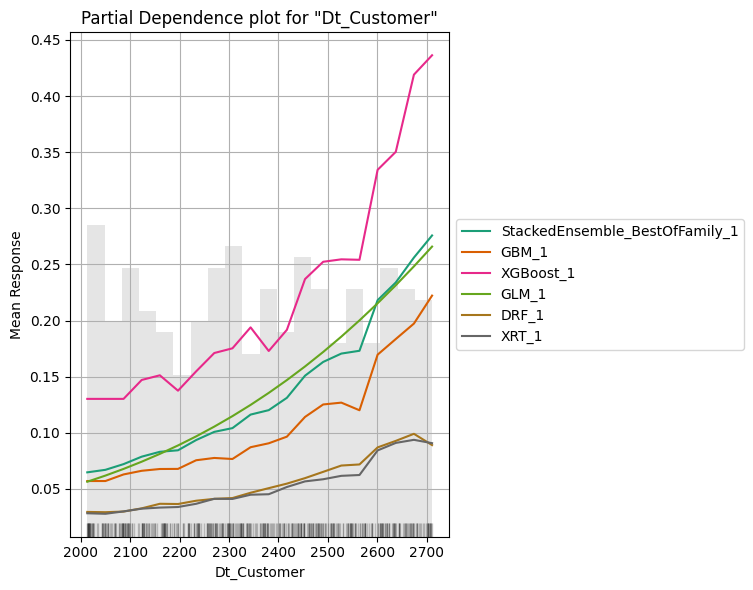

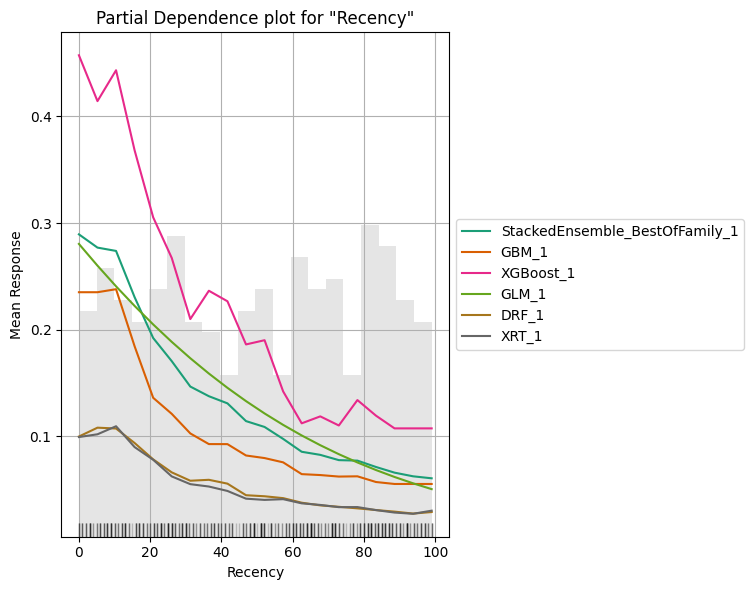

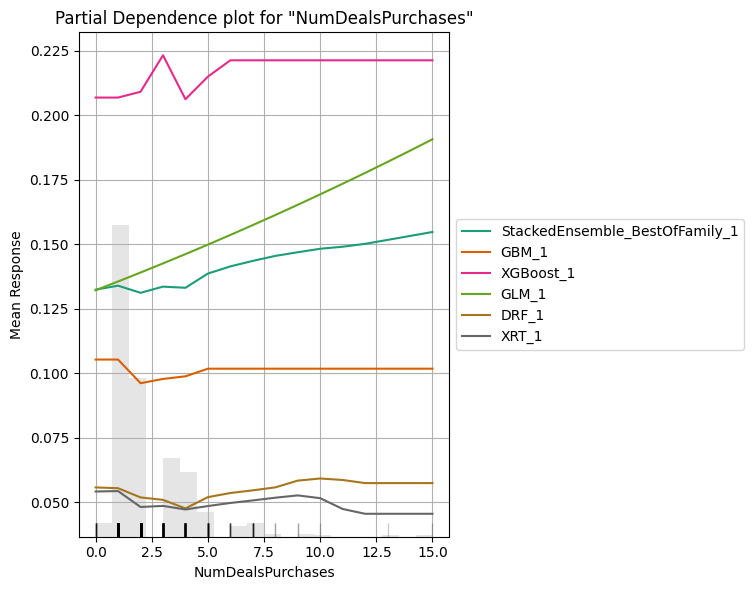

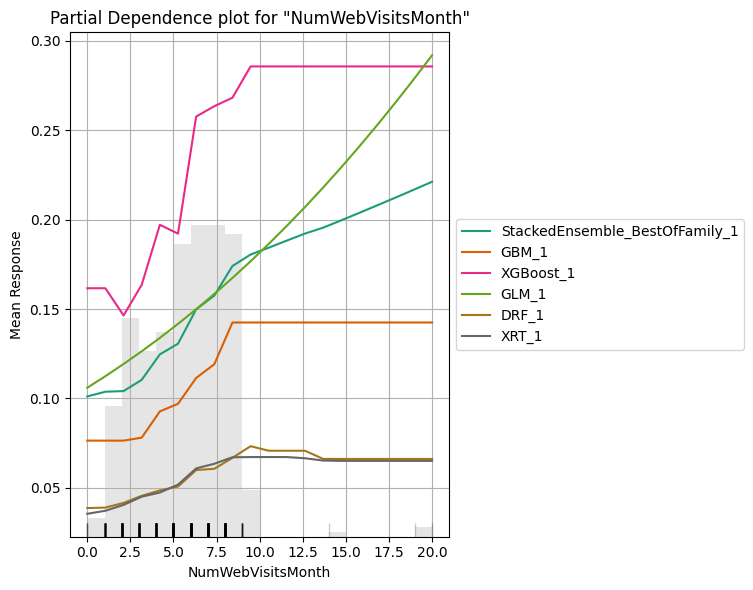

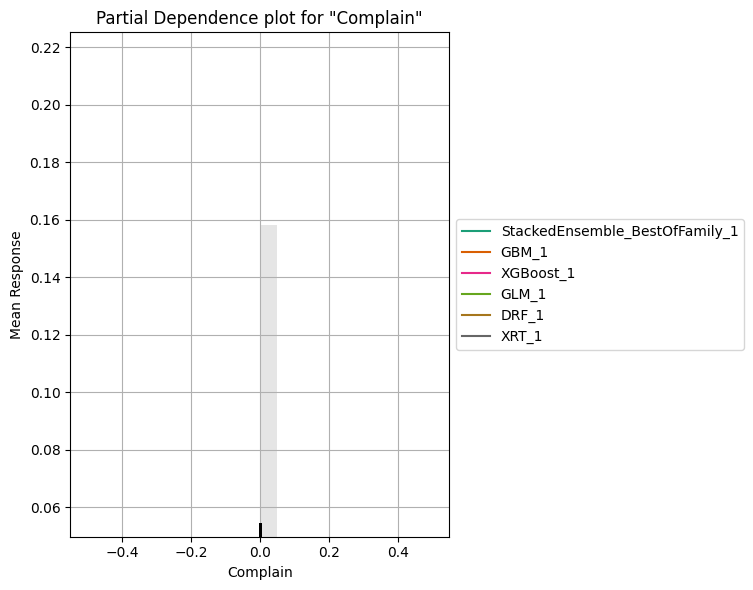

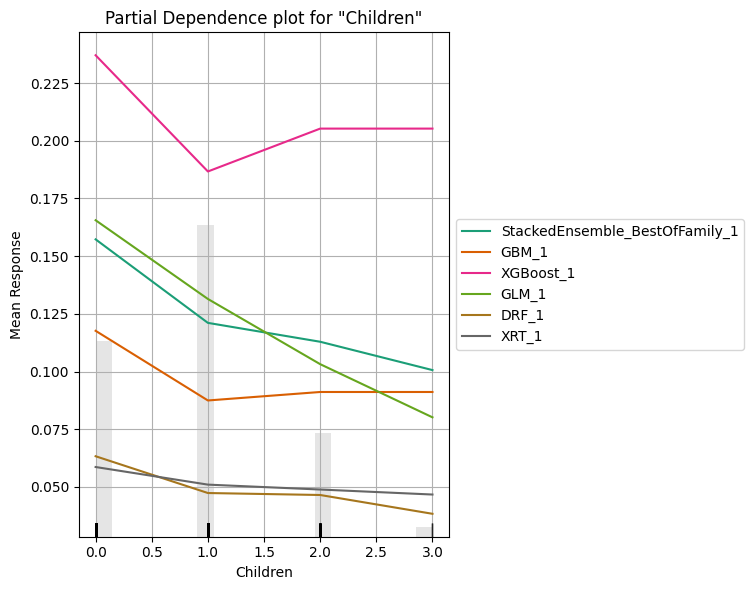

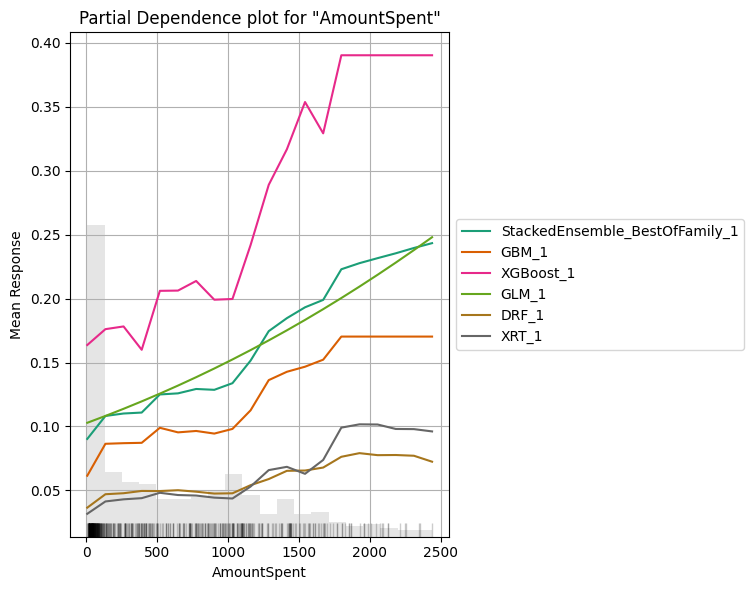

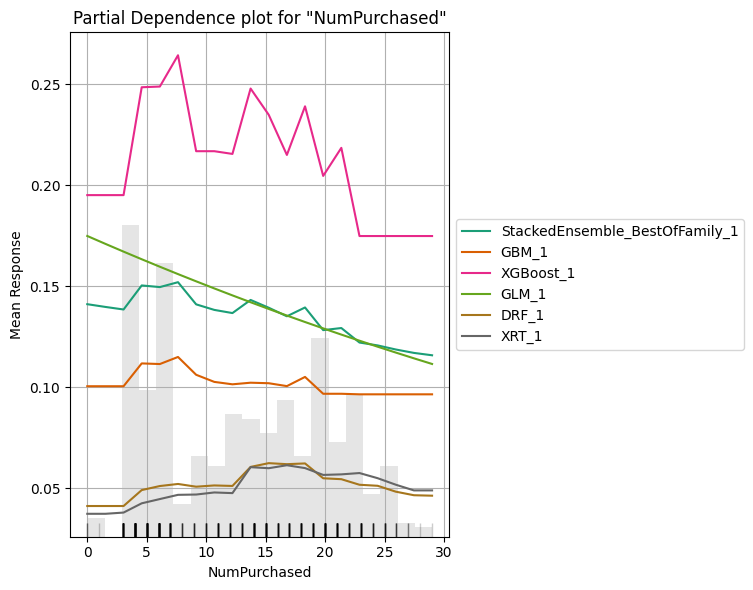

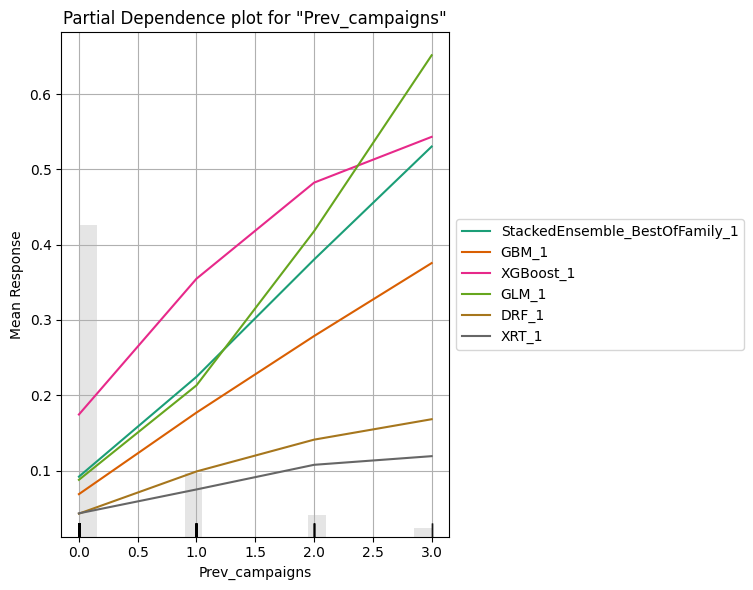

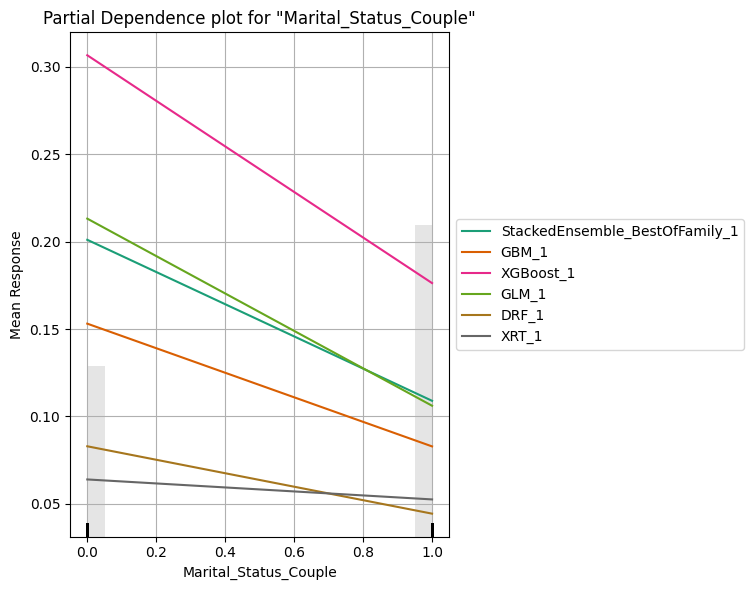

In [24]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])


## Interpreting Partial Dependency Plots

The pdp shows us the effect of each feature on prediction.

Prev_campaign has a high linear dependency while compain has no effect on prediction

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_3_20230329_233831,0.897058,0.269962,0.68976,0.213131,0.28464,0.0810197,3835,0.069813,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_3_20230329_233831,0.894888,0.27076,0.683962,0.221751,0.285109,0.0812869,3721,0.065827,StackedEnsemble
GBM_1_AutoML_3_20230329_233831,0.889791,0.292059,0.650468,0.211379,0.299307,0.0895844,439,0.022294,GBM
GLM_1_AutoML_3_20230329_233831,0.886208,0.284847,0.654289,0.177377,0.294995,0.0870222,196,0.013965,GLM
XGBoost_1_AutoML_3_20230329_233831,0.882864,0.331226,0.635593,0.214365,0.324523,0.105315,1666,0.024566,XGBoost
XGBoost_2_AutoML_3_20230329_233831,0.882824,0.314093,0.635274,0.198877,0.309588,0.0958446,239,0.014888,XGBoost
GBM_2_AutoML_3_20230329_233831,0.869028,0.330442,0.627245,0.197742,0.31441,0.0988535,272,0.021789,GBM
DRF_1_AutoML_3_20230329_233831,0.868092,0.44756,0.60938,0.234353,0.32914,0.108333,538,0.024313,DRF
GBM_3_AutoML_3_20230329_233831,0.867196,0.33761,0.62132,0.189122,0.316828,0.10038,515,0.017947,GBM
GBM_4_AutoML_3_20230329_233831,0.861164,0.345563,0.610488,0.254479,0.316644,0.100264,485,0.017673,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_3_20230329_233831

,0,1,Error,Rate
0,345.0,19.0,0.0522,(19.0/364.0)
1,27.0,42.0,0.3913,(27.0/69.0)
Total,372.0,61.0,0.1062,(46.0/433.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

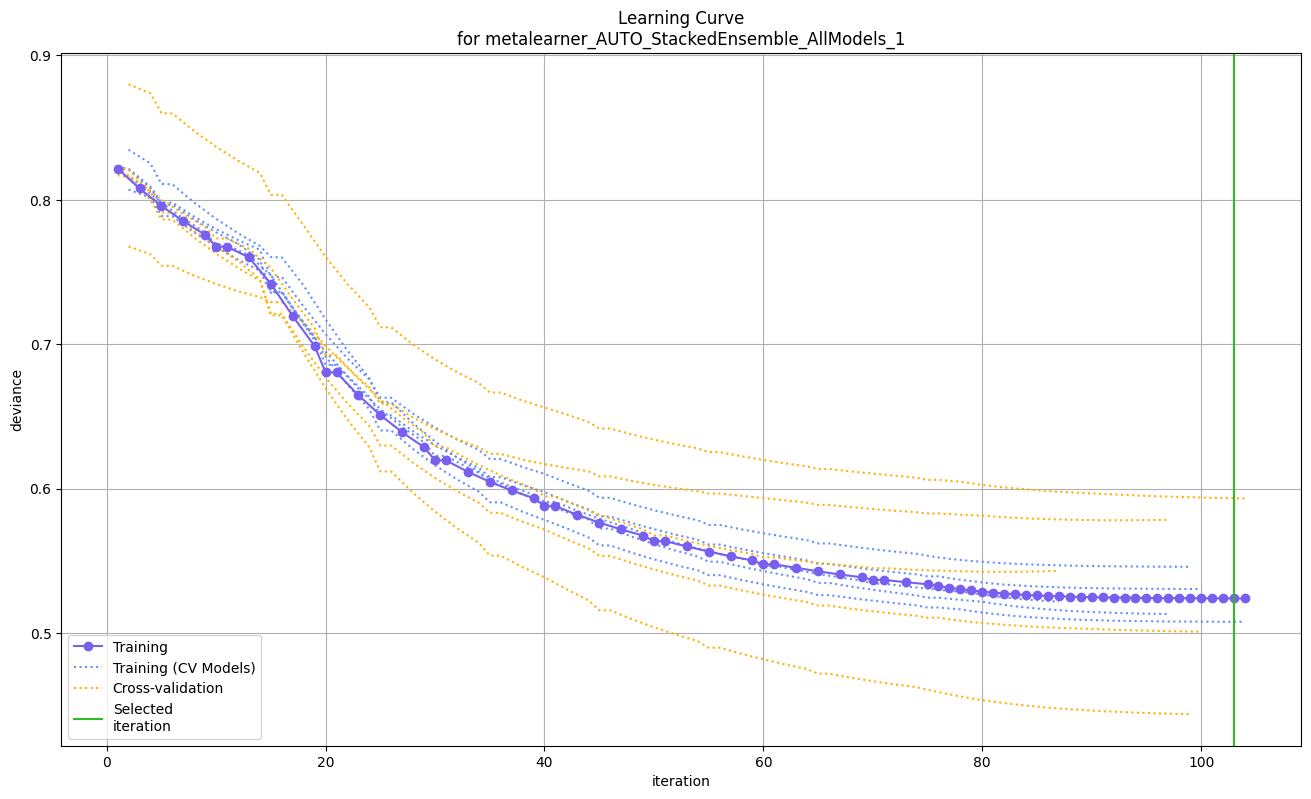

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

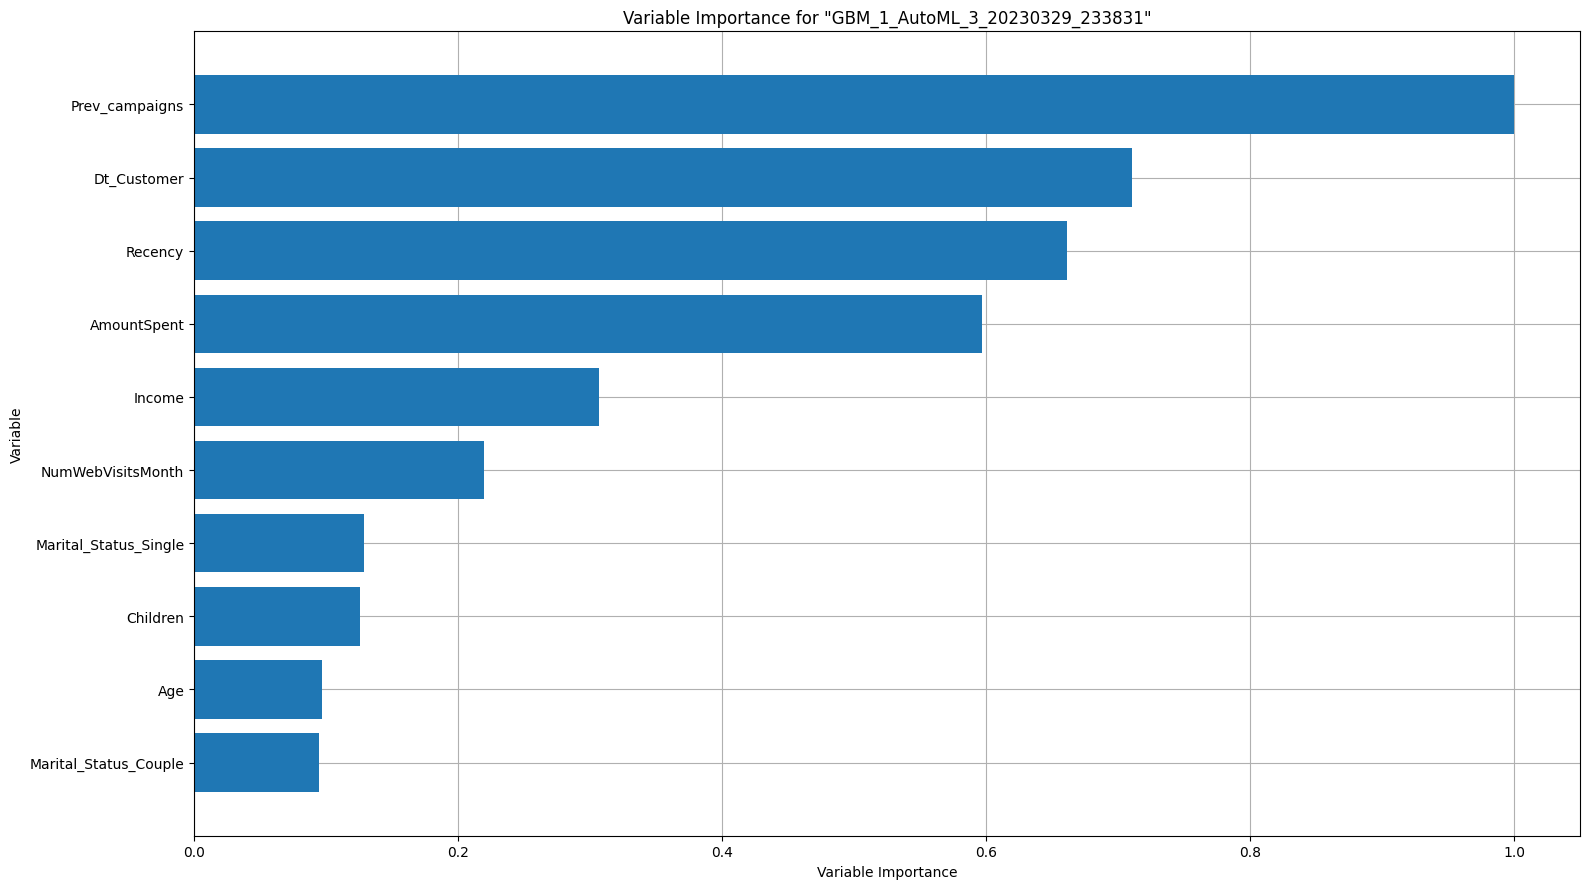

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

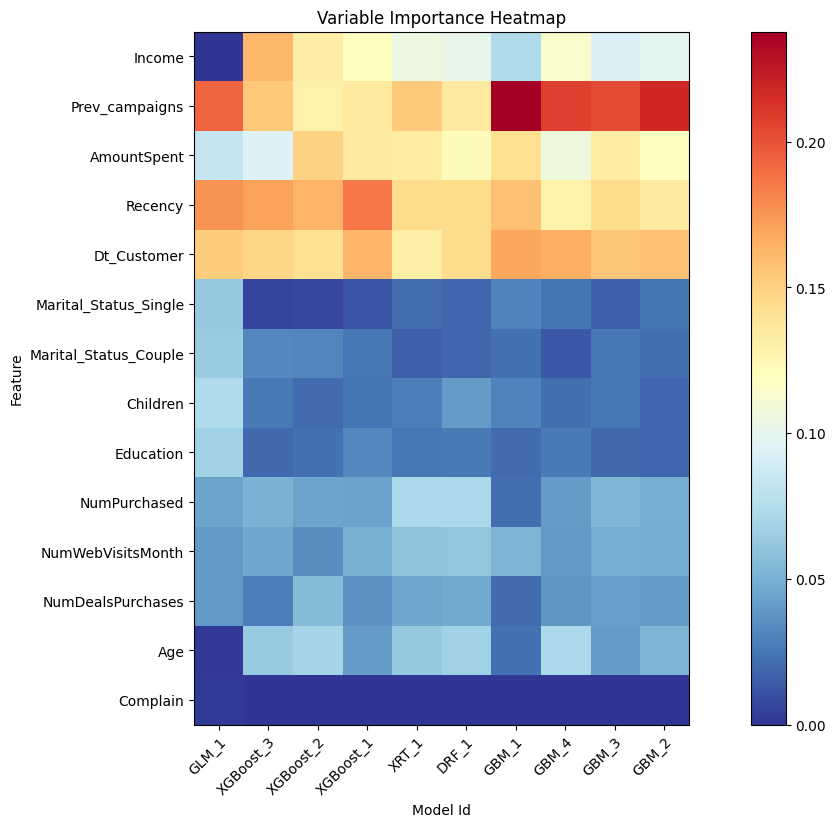

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

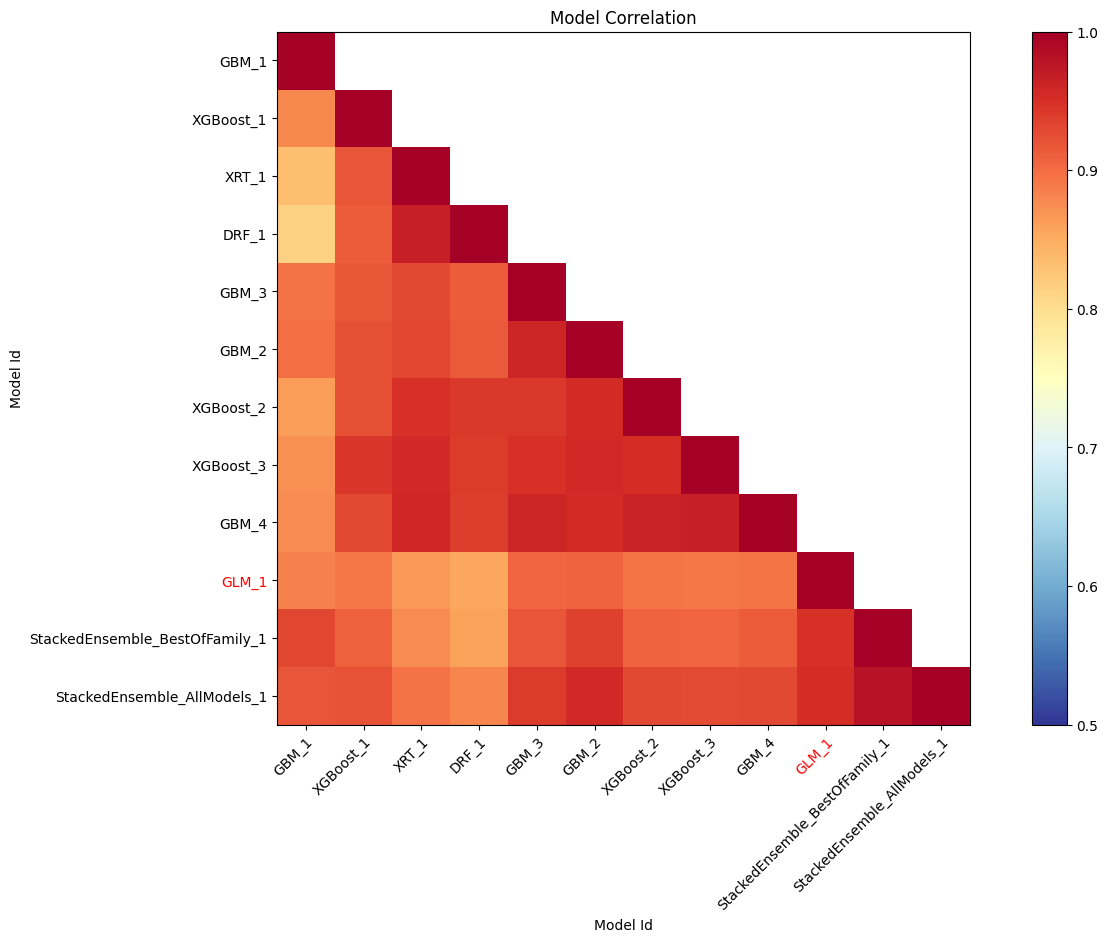

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

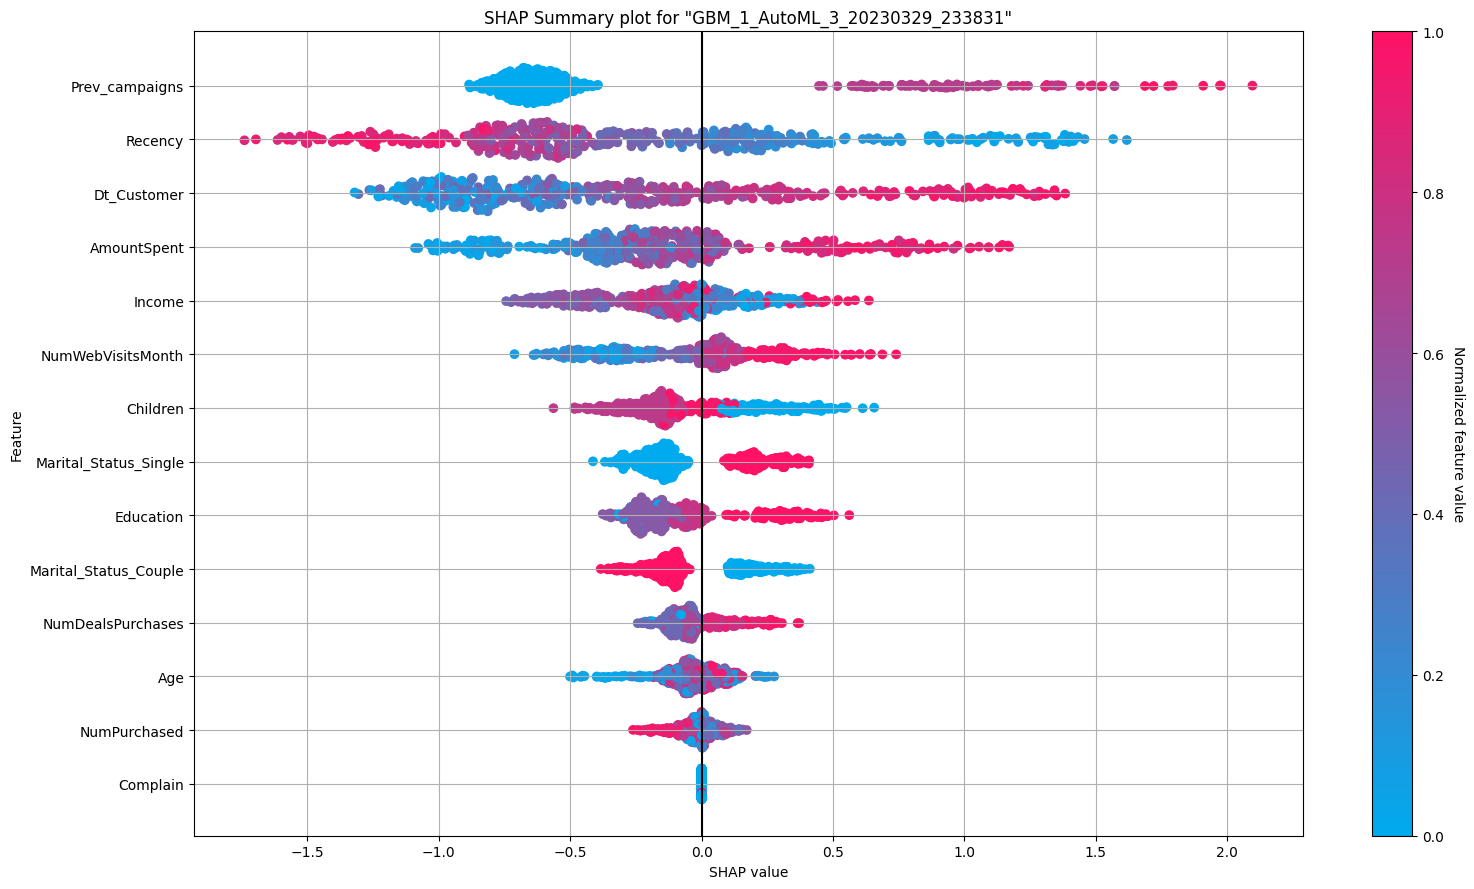

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

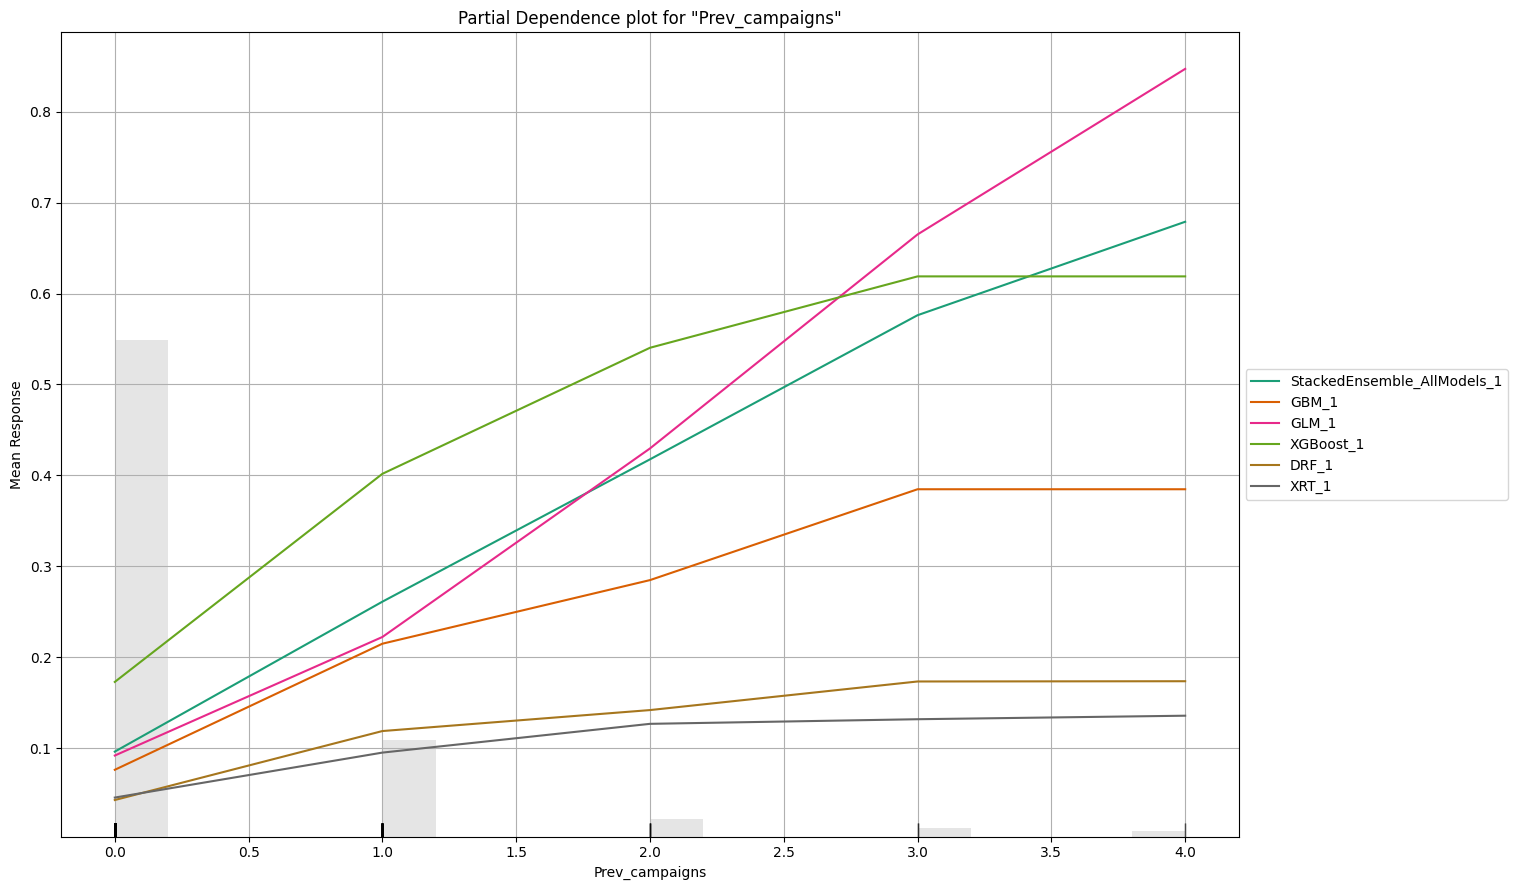

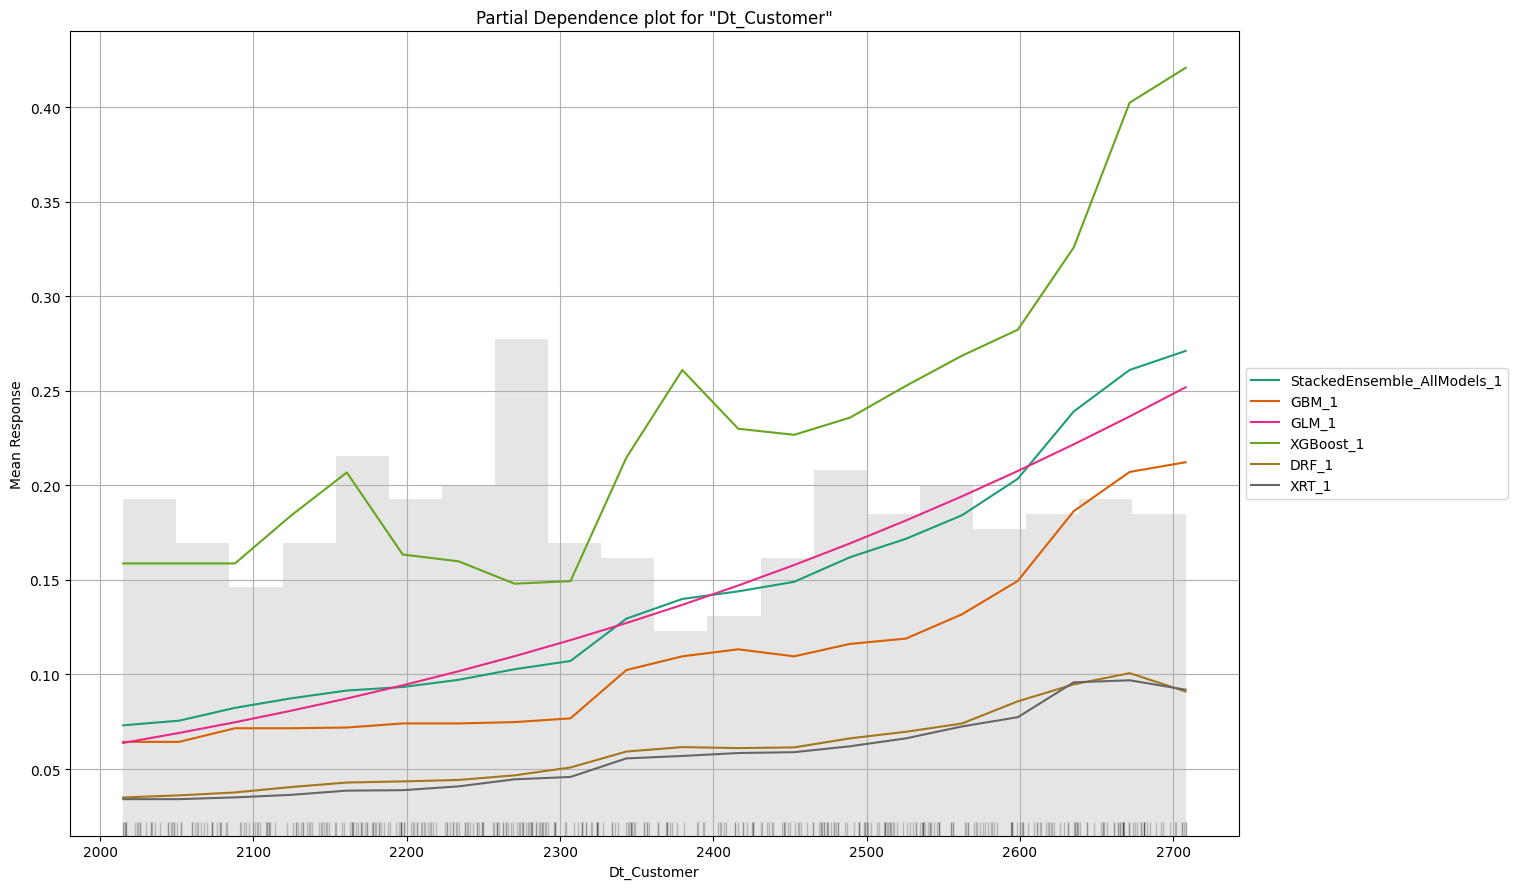

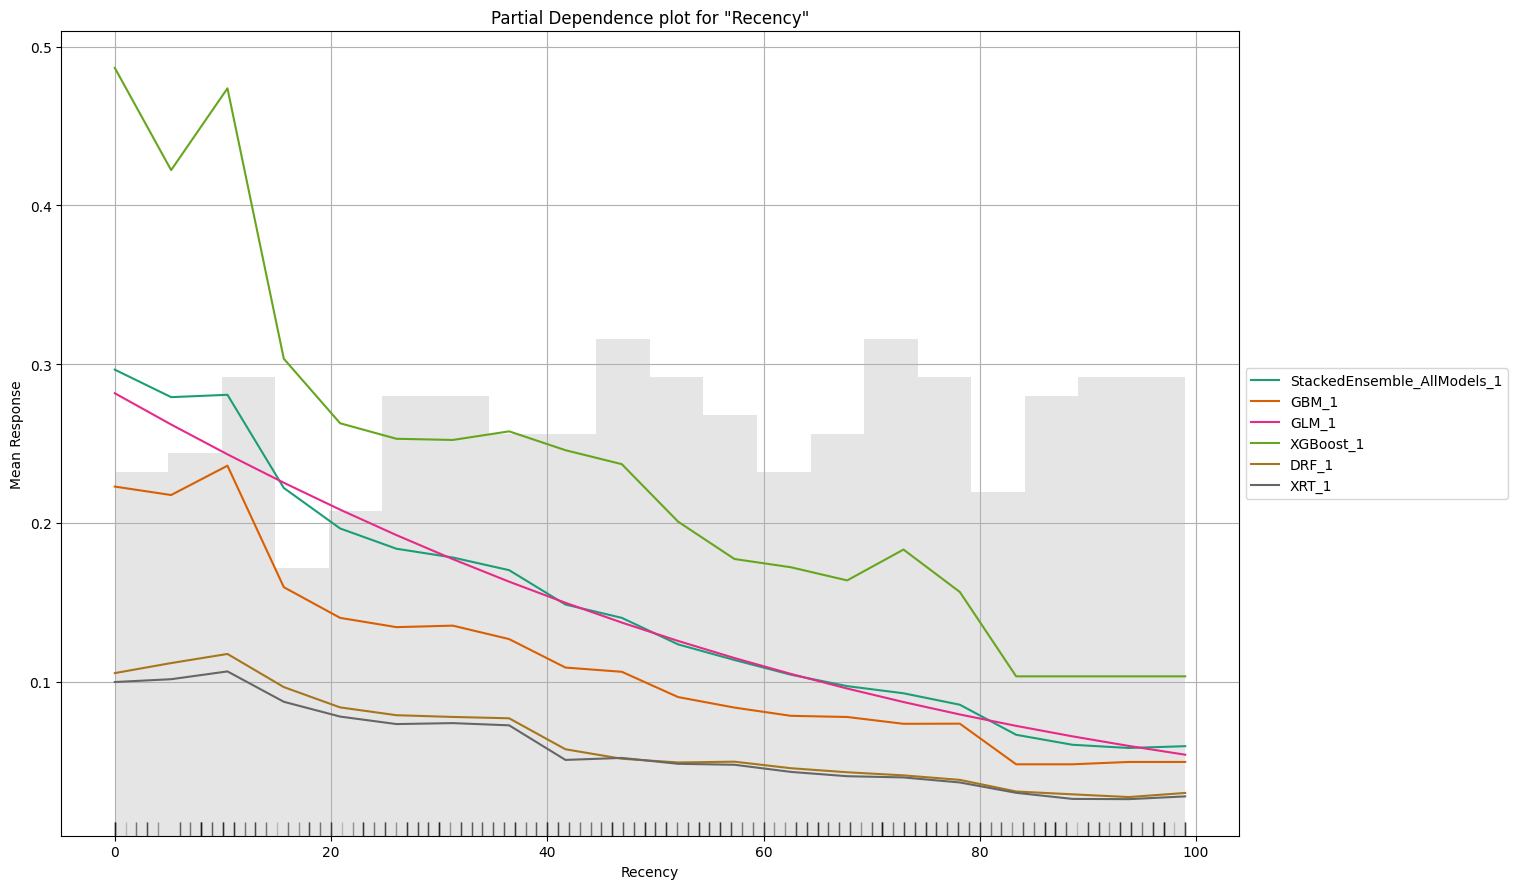

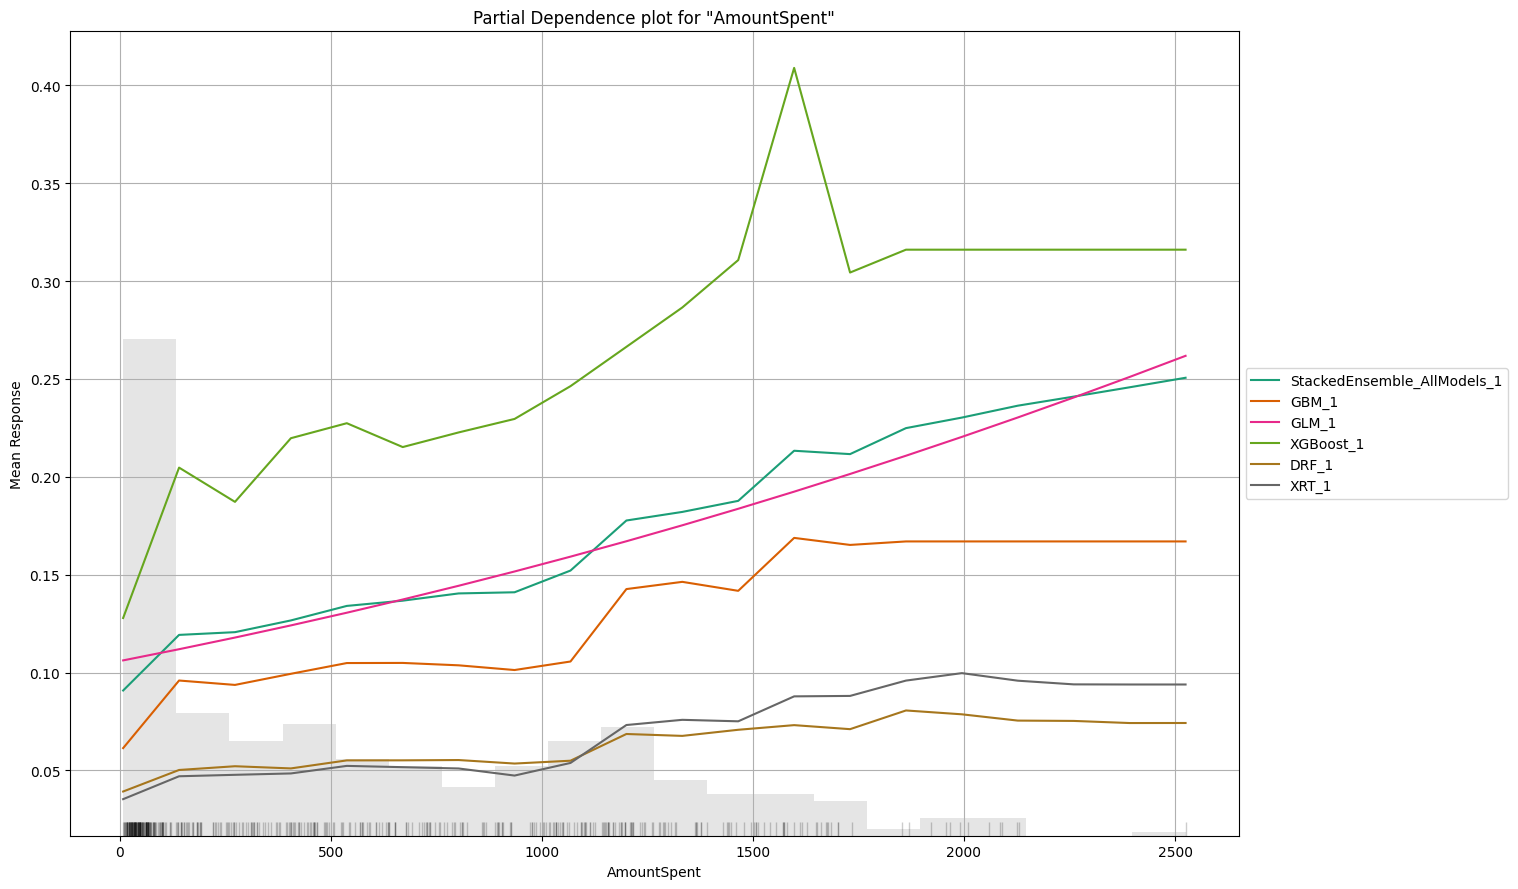

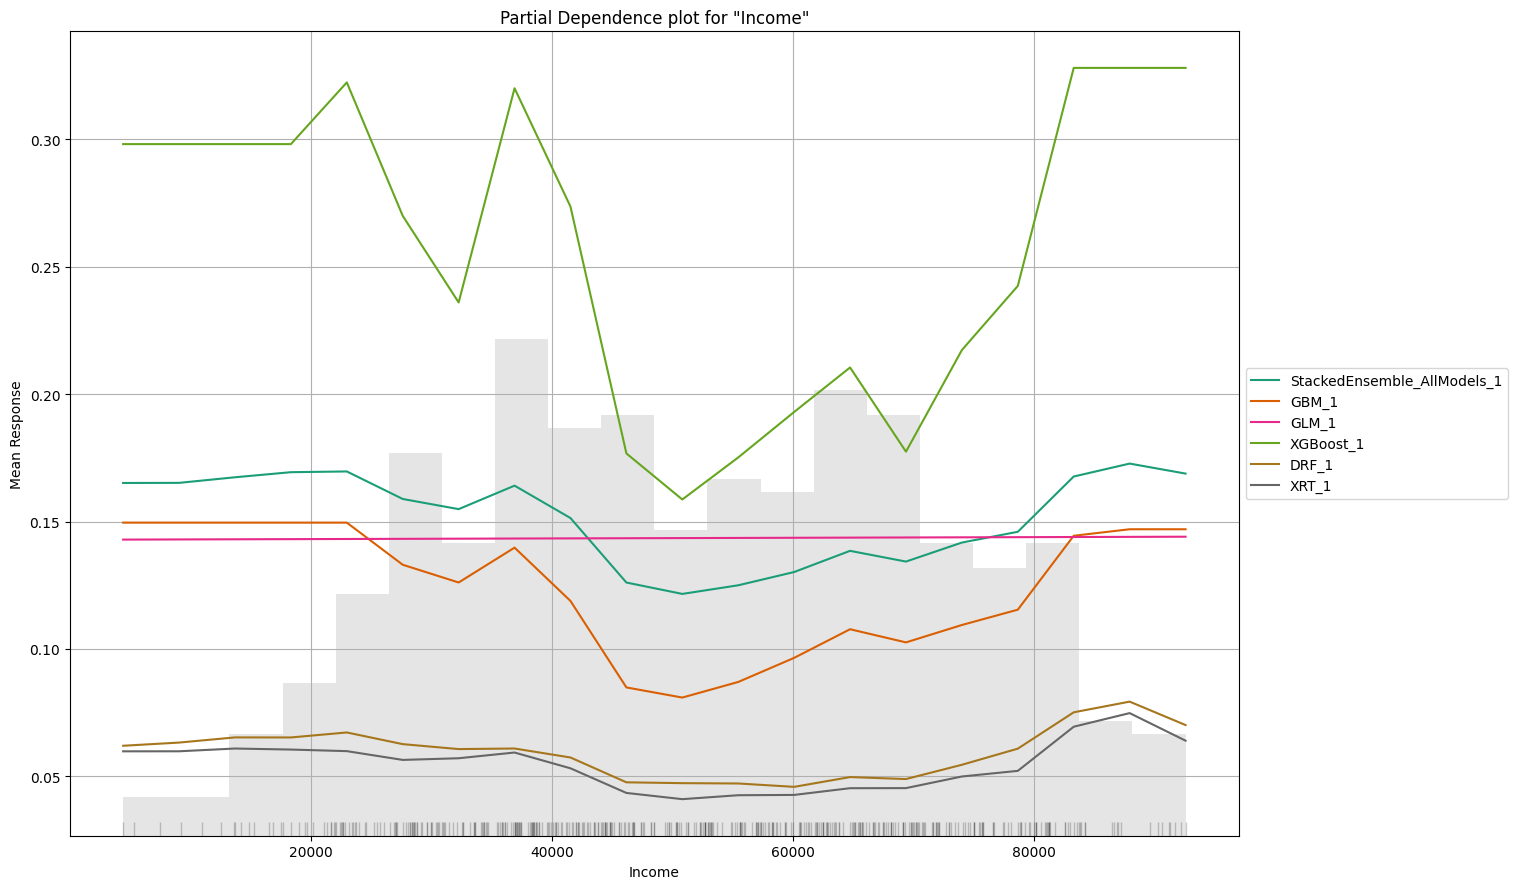

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_3_20230329_233831,0.897058,0.269962,0.68976,0.213131,0.28464,0.0810197,3835,0.069813,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_3_20230329_233831,0.894888,0.27076,0.683962,0.221751,0.285109,0.0812869,3721,0.065827,StackedEnsemble
GBM_1_AutoML_3_20230329_233831,0.889791,0.292059,0.650468,0.211379,0.299307,0.0895844,439,0.022294,GBM
GLM_1_AutoML_3_20230329_233831,0.886208,0.284847,0.654289,0.177377,0.294995,0.0870222,196,0.013965,GLM
XGBoost_1_AutoML_3_20230329_233831,0.882864,0.331226,0.635593,0.214365,0.324523,0.105315,1666,0.024566,XGBoost
XGBoost_2_AutoML_3_20230329_233831,0.882824,0.314093,0.635274,0.198877,0.309588,0.0958446,239,0.014888,XGBoost
GBM_2_AutoML_3_20230329_233831,0.869028,0.330442,0.627245,0.197742,0.31441,0.0988535,272,0.021789,GBM
DRF_1_AutoML_3_20230329_233831,0.868092,0.44756,0.60938,0.234353,0.32914,0.108333,538,0.024313,DRF
GBM_3_AutoML_3_20230329_233831,0.867196,0.33761,0.62132,0.189122,0.316828,0.10038,515,0.017947,GBM
GBM_4_AutoML_3_20230329_233831,0.861164,0.345563,0.610488,0.254479,0.316644,0.100264,485,0.017673,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_3_20230329_233831

,0,1,Error,Rate
0,345.0,19.0,0.0522,(19.0/364.0)
1,27.0,42.0,0.3913,(27.0/69.0)
Total,372.0,61.0,0.1062,(46.0/433.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [54]:
aml.explain(test)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

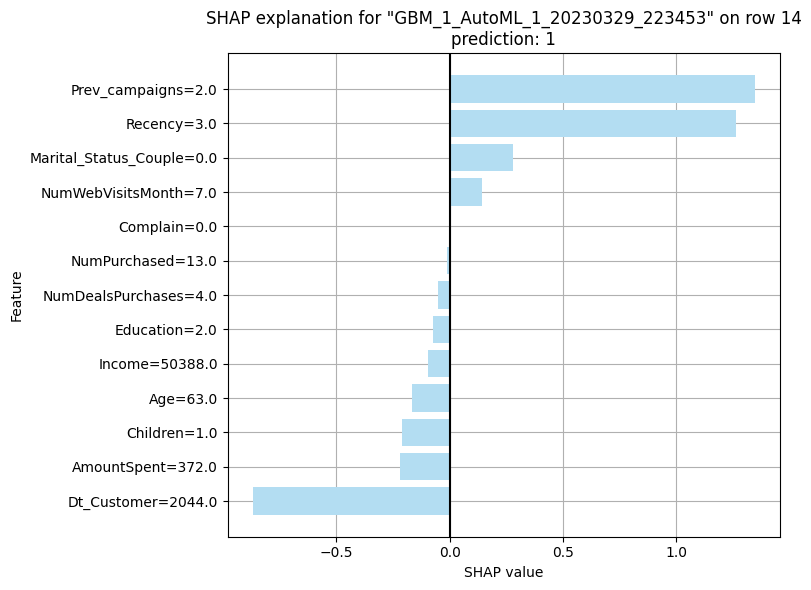

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [30]:
aml.explain_row(frame = test, row_index = 14, figsize = (8,6), exclude_explanations = "leaderboard")
